# Decision Trees, Random Forests and Ensemble Methods

The purpose of this practical work is to implement differents methods based on Decision Trees. We will also focus on using a good protocol to evaluate our model.

## Simple Decision Tree 

First, let's download a toy dataset to learn a decision tree, the iris dataset. Check the documentation to understand what it represent.

1) using the default values provided by sklearn, learn a simple decision tree.
2) explain the displayed figure.

In [4]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

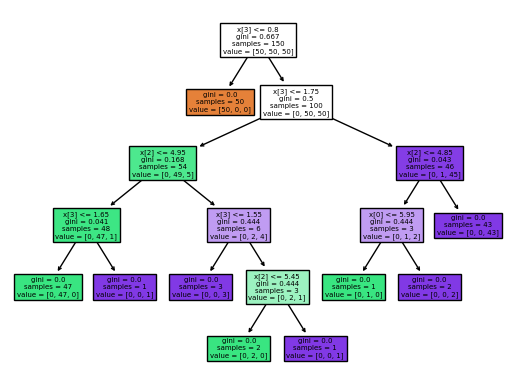

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf,label='all',filled=True,impurity=True);


 3) Change the max depth to 3. What do you expect ?

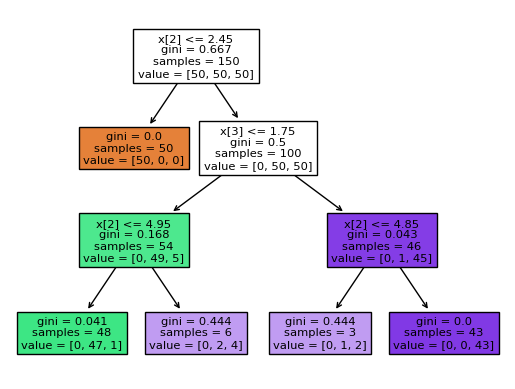

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf,label='all',filled=True,impurity=True);


Now, we know how to learn a classifier, we will focus on the design  of a predictive model, by setting its hyperparameters in a proper way.

1) Identify the hyperparameters to tune
2) Identify a protocol to fit correctly the hyperparameters
3) How do you measure the final performance of your model ?
4) Implement the code to find an optimal value for each hyperparameter


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=0)

#parameters 
max_depth = [1,2,3,5,7]

#grid search
for i in max_depth:
        clf = tree.DecisionTreeClassifier(max_depth=i,criterion='entropy')
        clf = clf.fit(X_train, y_train)
        ypred= clf.predict(X_val)
        acc = accuracy_score(ypred,y_val)
        acc_train = accuracy_score(y_train,clf.predict(X_train))
        print(f"max_depth: {i}, score val {acc:.2f}, score train {acc_train:.2f}")

print(f"score final : {accuracy_score(y_test,clf.predict(X_test)):.2f}")

max_depth: 1, score val 0.75, score train 0.67
max_depth: 2, score val 0.97, score train 0.96
max_depth: 3, score val 1.00, score train 0.97
max_depth: 5, score val 0.94, score train 1.00
max_depth: 7, score val 0.97, score train 1.00
score final : 0.96


To make your life easier, sklearn developpers develop the `GridSearchCV` class which mimics your previous code, but in a more efficient way

1) Adapt your code to run the `GridSearchCV` and find the best hyperparameters
2) What does `GridSearchCV` do ?
3) Retrieve the validation accuracy of your `GridSearchCV`

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
parameters = {'max_depth':[1,2,3,5,7]}
clf = tree.DecisionTreeClassifier()
cv = GridSearchCV(clf,parameters)
cv.fit(X_train,y_train)
print(f"{cv.best_params_=}")
print(f"{cv.best_score_=}, {cv.score.__name__ =}")
print(f"score final : {accuracy_score(y_test,cv.predict(X_test)):.2f}")

cv.best_params_={'max_depth': 3}
cv.best_score_=0.9428571428571428, cv.score.__name__ ='score'
score final : 0.98


## Random Forests

Now, we will enchance our model by implementing a Random Forest. To this end, let's use the `RandomForestClassifier` class of scikit-learn.

1) Why not using `RandomForestRegressor`
2) Retrieve the hyperparameter discussed in class in this implementation
3) How is made the final decision ?
4) Learn a simple RandomForest and give the performance on test set
5) Define the hyperparameters values to be tuned
6) Learn your model, and conclude. 


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
perf_test = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
    parameters = { 'n_estimators':[10,50,100,200,500],
                'max_depth':[None],
                "min_samples_split":[2],
                "max_features":["sqrt",None]
                }
    clf = RandomForestClassifier()
    cv = GridSearchCV(clf,parameters)
    cv.fit(X_train,y_train)
    print(f"{cv.best_params_=}")
    print(f"{cv.best_score_=:.2f}")
    perf_test.append(accuracy_score(y_test,cv.predict(X_test)))

print(f"score final : {np.mean(perf_test):.2f} +- {np.std(perf_test):.2f}")




cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
cv.best_score_=0.96
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
cv.best_score_=0.95
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
cv.best_score_=0.96
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
cv.best_score_=0.96
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
cv.best_score_=0.96
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
cv.best_score_=0.96
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
cv.best_score_=0.96
cv.best_params_={'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
cv.best_score_=0.96
cv.be

### Increasing the difficulty

Now, we will focus on a chemical dataset, used in one of our research papers.

In [2]:
from datasets.cobra import CobraDataset

data_Cobra = CobraDataset()
X_cobra_graph = data_Cobra.graph_data
X_cobra_atom = data_Cobra.atom_data
X_cobra_graph_atom = data_Cobra.all_data
y_cobra = data_Cobra.targets



In [3]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
import numpy as np


In [37]:

def evaluate_model(X,y, model, parameters, splits):
    """
    for regression
    """
    mae_runs = []
    cvs = []
    y_pred = np.zeros(y.shape)
    for (idx_train, idx_test) in tqdm(splits,leave=False):
        cv = GridSearchCV(model,parameters,cv=10,scoring='neg_mean_absolute_error',n_jobs=-1)
        cv.fit(X[idx_train, :], y[idx_train])
        y_pred[idx_test] = cv.predict(X[idx_test,:])
        cvs.append(cv)
        
    return y_pred, cvs

# Parameters and Data for each method
parameters = { 'n_estimators':[25,50,100,75, 150 ,200],
            'max_depth':[None,3,5],
            "min_samples_split":[2],
            "max_features":["sqrt",None]
            }

methods = [
    {"name": "Global inputs", "X": X_cobra_graph},
    {"name": "Atom inputs", "X": X_cobra_atom},
    {"name": "Combined inputs",  "X": X_cobra_graph_atom}
]
n = X_cobra_graph.shape[0]

#define model
regressor = RandomForestRegressor()
maes = {m['name']:[] for m in methods}

for _ in tqdm(range(2)):
    #define splits
    kf = KFold(n_splits=10,shuffle=True)
    splits = []
    for idx_train, idx_test in kf.split(np.arange(n)):
        splits.append((idx_train,idx_test))
    for method in methods:
        y_pred, cvs = evaluate_model(method["X"], 
                                            y_cobra, 
                                            regressor,
                                            parameters,
                                            splits)
        error = np.abs(y_cobra - y_pred)
        maes[method["name"]].append(np.mean(error))
        print(f"{method['name']}: Mean MAE = {np.mean(error):.2f}, Std MAE = {np.std(error):.2f}")
        print(cv.best_params_)

100%|██████████| 10/10 [01:05<00:00,  6.55s/it]


Global inputs: Mean MAE = 2.05, Std MAE = 3.30
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 10/10 [04:03<00:00, 24.37s/it]


Atom inputs: Mean MAE = 1.53, Std MAE = 2.55
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 10/10 [04:21<00:00, 26.18s/it]


Combined inputs: Mean MAE = 1.45, Std MAE = 2.56
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 10/10 [01:35<00:00,  9.54s/it]


Global inputs: Mean MAE = 2.08, Std MAE = 3.31
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 10/10 [03:52<00:00, 23.25s/it]


Atom inputs: Mean MAE = 1.57, Std MAE = 2.54
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 10/10 [04:16<00:00, 25.64s/it]

Combined inputs: Mean MAE = 1.51, Std MAE = 2.57
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


In [38]:
for m in methods:
    print(f"{m['name']}: Mean MAE = {np.mean(maes[m['name']]):.2f}, Std MAE = {np.std(maes[m['name']]):.2f}")
               

Global inputs: Mean MAE = 2.07, Std MAE = 0.01
Atom inputs: Mean MAE = 1.55, Std MAE = 0.02
Combined inputs: Mean MAE = 1.48, Std MAE = 0.03


## Ensemble methods with Boosting

Random forest are just one kind of ensemble methods based on trees. Others methods, more complex, have been proposed. Here, we will test two famous one : Gradient Boosting Decision Trees and Xgboost. These methods are the state of the art when dealing with tabular data.

1) Implement a simple `GradientBoostingRegressor` from the scikit-learn library
2) As usual, what hyperparameters will you focus on ? Do you understand them ?
3) Find the best hyperparameters and compute the performance on test set.
4) Do the same using the `XGBRegressor` from xgboost library. Comment on similar things.

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

maes = {m['name']:[] for m in methods}
parameters = { 'n_estimators':[25,50,100,75, 150 ,200],
            'learning_rate':[1e-2,5e-2,1e-1,.5],
            }
regressor = GradientBoostingRegressor()

for _ in tqdm(range(1)):
    #define splits
    kf = KFold(n_splits=10,shuffle=True)
    splits = []
    for idx_train, idx_test in kf.split(np.arange(n)):
        splits.append((idx_train,idx_test))
    for method in methods:
        y_pred, cvs = evaluate_model(method["X"], 
                                            y_cobra, 
                                            regressor,
                                            parameters,
                                            splits)
        error = np.abs(y_cobra - y_pred)
        maes[method["name"]].append(np.mean(error))
        print(f"{method['name']}: Mean MAE = {np.mean(error):.2f}, Std MAE = {np.std(error):.2f}")
        
for m in methods:
    print(f"{m['name']}: Mean MAE = {np.mean(maes[m['name']]):.2f}, Std MAE = {np.std(maes[m['name']]):.2f}")
               

100%|██████████| 10/10 [00:42<00:00,  4.30s/it]


Global inputs: Mean MAE = 2.10, Std MAE = 3.40
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 10/10 [04:00<00:00, 24.03s/it]


Atom inputs: Mean MAE = 1.51, Std MAE = 2.66
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}


100%|██████████| 1/1 [08:52<00:00, 532.40s/it]

Combined inputs: Mean MAE = 1.48, Std MAE = 2.73
{'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}
Global inputs: Mean MAE = 2.10, Std MAE = 0.00
Atom inputs: Mean MAE = 1.51, Std MAE = 0.00
Combined inputs: Mean MAE = 1.48, Std MAE = 0.00


In [44]:
import xgboost as xgb

## Protocole à factoriser !
maes = {m['name']:[] for m in methods}
parameters = { 'n_estimators':[25,50,100,75, 150 ,200],
            'learning_rate':[1e-2,5e-2,1e-1,.5]
            }
regressor = model = xgb.XGBRegressor()

for _ in tqdm(range(1)):
    #define splits
    kf = KFold(n_splits=10,shuffle=True)
    splits = []
    for idx_train, idx_test in kf.split(np.arange(n)):
        splits.append((idx_train,idx_test))
    for method in methods:
        y_pred, cvs = evaluate_model(method["X"], 
                                    y_cobra, 
                                    regressor,
                                    parameters,
                                    splits)
        error = np.abs(y_cobra - y_pred)
        maes[method["name"]].append(np.mean(error))
        print(f"{method['name']}: Mean MAE = {np.mean(error):.2f}, Std MAE = {np.std(error):.2f}")
        print(cvs[-1].best_params_)
for m in methods:
    print(f"{m['name']}: Mean MAE = {np.mean(maes[m['name']]):.2f}, Std MAE = {np.std(maes[m['name']]):.2f}")
               


100%|██████████| 10/10 [00:38<00:00,  3.90s/it]


Global inputs: Mean MAE = 2.31, Std MAE = 3.84
{'learning_rate': 0.5, 'n_estimators': 50}


100%|██████████| 10/10 [05:15<00:00, 31.55s/it]


Atom inputs: Mean MAE = 1.80, Std MAE = 2.61
{'learning_rate': 0.5, 'n_estimators': 25}


100%|██████████| 1/1 [11:53<00:00, 713.11s/it]

Combined inputs: Mean MAE = 1.53, Std MAE = 2.55
{'learning_rate': 0.05, 'n_estimators': 75}
Global inputs: Mean MAE = 2.31, Std MAE = 0.00
Atom inputs: Mean MAE = 1.80, Std MAE = 0.00
Combined inputs: Mean MAE = 1.53, Std MAE = 0.00


# Rajouter Gros dataset, et ils comparent les méthodes ?